# Importating functions and clases from cookie_clusters

In [1]:
from cookie_clusters import *

# Trying the algo over some selected pixels

### Creation of the data_set

In [2]:
import os
import cv2
from PIL import Image
import rasterio as rio
import re
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# List and dict of target pixels
pixels_de_interet, dic_de_pixels = create_dic_pixels()

## On divise les images Sentinel 2A et 2B et on les mets en ordre cronologique

In [4]:
dir = "../../ressources/images"
images_list = os.listdir(dir)

images_2A = list()
images_2B = list()
prog = re.compile(r'\w+2A')
for image in images_list:
    if prog.match(image):
        images_2A.append(image)
    else:
        images_2B.append(image)
        
images_2A.sort()
images_2B.sort()
all_images = images_2A + images_2B
all_images = sorted(all_images, key=lambda date: date[16:24])      

In [5]:
# Her you can chose the list of images you want to use.
list_to_use = all_images
line = 0
matrice_rouge = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_vert = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_bleu = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_nir = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_ndvi = np.zeros((len(pixels_de_interet), len(list_to_use)))
for image in list_to_use:
    with rio.open(dir+'/'+image, 'r') as ds:
        band1 = ds.read(1)
        band2 = ds.read(2)
        band3 = ds.read(3)
        band4 = ds.read(4)
        ndvi = (band1-band2)/(band1+band2) # Normalized Difference Vegetation Index
        ndvi = np.nan_to_num(ndvi)
    # Extraction of target pixels
    for pixel,j in zip(pixels_de_interet, range(len(pixels_de_interet))):
        matrice_vert[j,line] = band3[pixel[0], pixel[1]]
        matrice_rouge[j,line] = band2[pixel[0], pixel[1]]
        matrice_bleu[j,line] = band4[pixel[0], pixel[1]]
        matrice_nir[j,line] = band1[pixel[0], pixel[1]]
        matrice_ndvi[j,line] = ndvi[pixel[0], pixel[1]]
    line +=1

/tmp/ipykernel_834/36240959.py:15: RuntimeWarning: invalid value encountered in divide
  ndvi = (band1-band2)/(band1+band2) # Normalized Difference Vegetation Index


(54, 141)


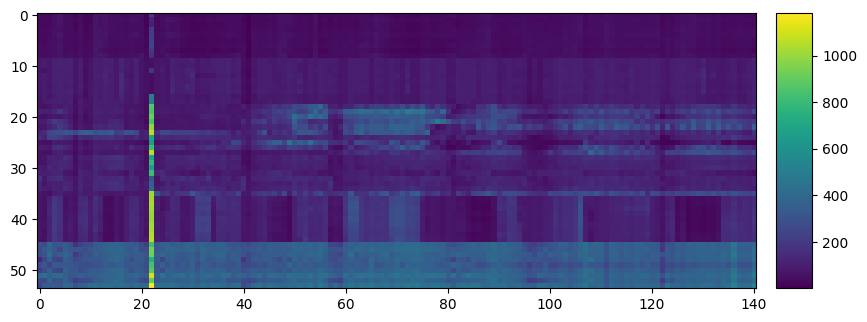

In [6]:
print(matrice_vert.shape)
#Looking for a pixels
img = (matrice_vert/8).astype(int)
#grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10))
ax = plt.gca()
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

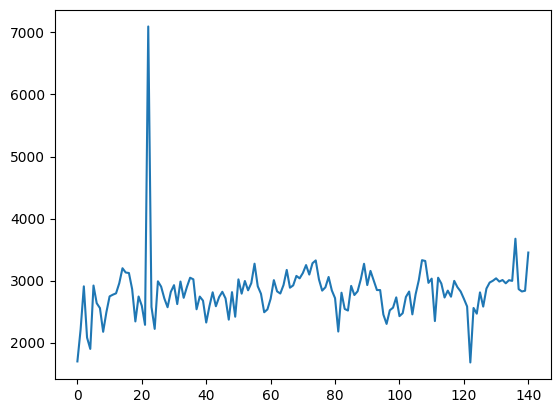

In [7]:
# L'image x est bizarre
plt.plot(matrice_vert[50])

In [8]:
chelou = np.argmax(matrice_vert[50])
display(f'image chelou = {chelou}')

'image chelou = 22'

In [9]:
matrice = np.delete(matrice_vert,chelou,1)

Axes(0.125,0.11;0.775x0.77)


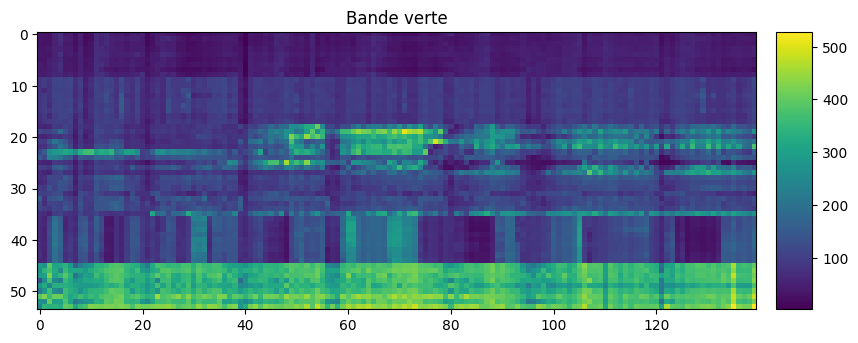

In [10]:
#Looking for a pixels
img = (matrice/8).astype(int)
#grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10))
plt.title('Bande verte')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

# Applying K-means

In [11]:
yhat = kmeans_dtw(matrice,6,15000)

## Showing the obtained results :

In [12]:
from cookie_clusters import evaluator_de_experiences

keys for the classes :

0: 'pix_foret'.

1: 'pix_lac'.

2: 'pix_apt'.

3: 'pix_ensta'.

4: 'pix_agri'.

5: 'pix_danone'.


,accuracy,f1_score
0,0.62963,0.546296


,calinski_harabasz_score
0,63.834805


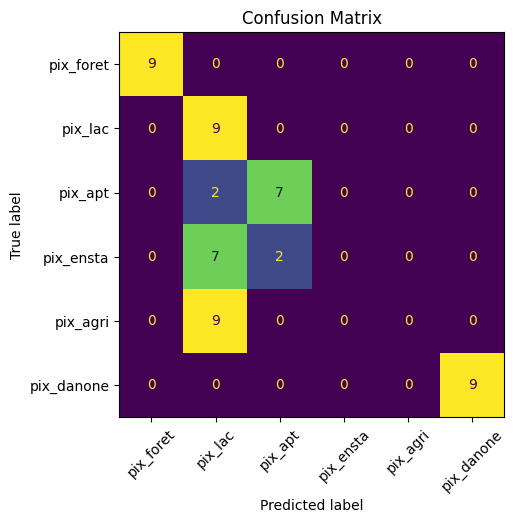

In [13]:
eval_bandevert = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_bandevert.confusion_matrix()
display(eval_bandevert.metrics_classif())
display(eval_bandevert.metrics_clustering())

In [14]:
eval_bandevert.show_list()

cluster numero 0:
-------------------------------
[478, 570] : pix_foret
[480, 570] : pix_foret
[482, 570] : pix_foret
[484, 570] : pix_foret
[486, 570] : pix_foret
-------------------------------
cluster numero 1:
-------------------------------
[472, 570] : pix_foret
[474, 570] : pix_foret
[476, 570] : pix_foret
-------------------------------
cluster numero 2:
-------------------------------
[392, 567] : pix_lac
[392, 580] : pix_lac
[401, 577] : pix_lac
[401, 567] : pix_lac
[395, 570] : pix_lac
[395, 576] : pix_lac
[397, 571] : pix_lac
[394, 598] : pix_lac
[388, 532] : pix_lac
[414, 440] : pix_apt
[420, 458] : pix_apt
[454, 627] : pix_ensta
[454, 631] : pix_ensta
[457, 632] : pix_ensta
[459, 625] : pix_ensta
[450, 641] : pix_ensta
[443, 636] : pix_ensta
[439, 629] : pix_ensta
[318, 438] : pix_agri
[322, 435] : pix_agri
[324, 433] : pix_agri
[329, 429] : pix_agri
[333, 426] : pix_agri
[337, 424] : pix_agri
[339, 422] : pix_agri
[344, 418] : pix_agri
[350, 414] : pix_agri
------------

### En repetant le processus avec les autres bandes

#### **Blue:**

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


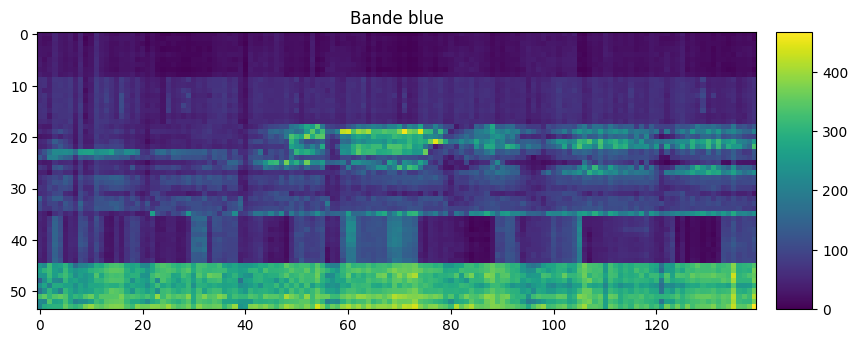

In [15]:
chelou = np.argmax(matrice_bleu[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_bleu, chelou, 1)
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande blue')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [16]:
yhat = kmeans_dtw(matrice,6,15000)

/home/julian/FilRouge_territoires/scripts/scripts_python/cookie_clusters.py:100: RuntimeWarning: Mean of empty slice.
  temp_cent = x[points == idx].mean(axis=0)
/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


,accuracy,f1_score
0,0.166667,0.047619


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

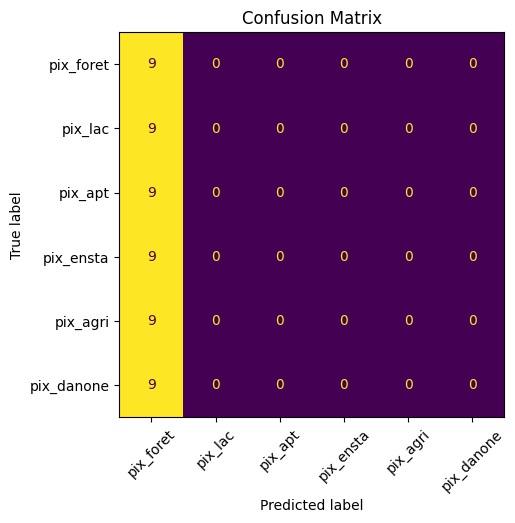

In [17]:
eval_bandebleu = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_bandebleu.confusion_matrix()
display(eval_bandebleu.metrics_classif())
display(eval_bandebleu.metrics_clustering())

#### **Rouge:**

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


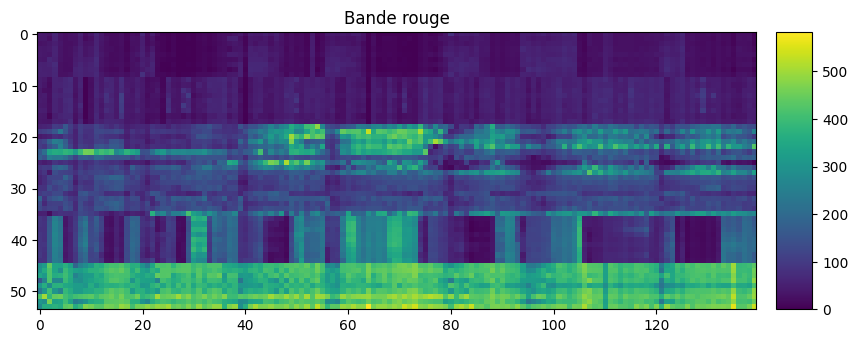

In [ ]:
chelou = np.argmax(matrice_rouge[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_rouge,chelou,1)
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande rouge')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [ ]:
yhat = kmeans_dtw(matrice,6,15000)

,accuracy,f1_score
0,0.666667,0.576942


,calinski_harabasz_score
0,46.095296


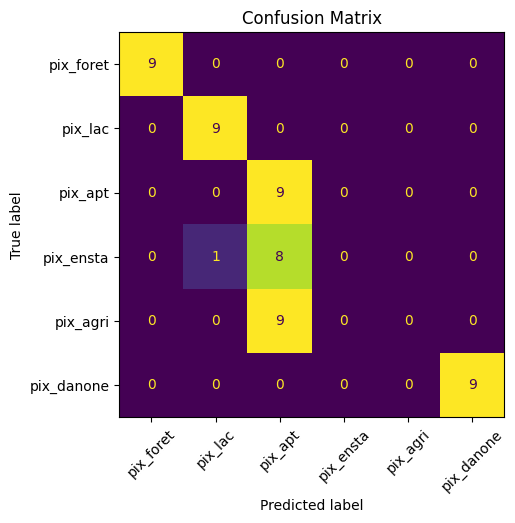

In [ ]:
eval_banderouge = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_banderouge.confusion_matrix()
display(eval_banderouge.metrics_classif())
display(eval_banderouge.metrics_clustering())

#### **NIR:**

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


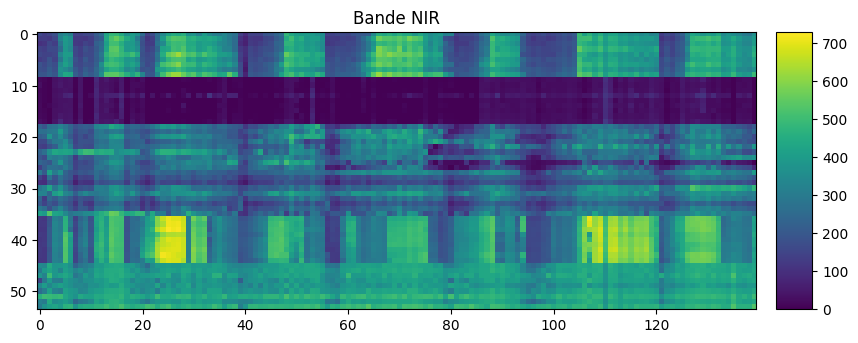

In [ ]:
chelou = np.argmax(matrice_nir[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_nir,chelou,1)
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande NIR')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [ ]:
yhat = kmeans_dtw(matrice,6,15000)

,accuracy,f1_score
0,0.740741,0.679404


,calinski_harabasz_score
0,55.533236


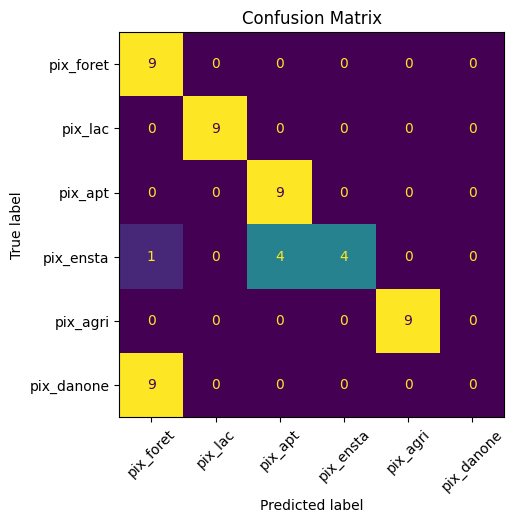

In [ ]:
eval_bandenri = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_bandenri.confusion_matrix()
display(eval_bandenri.metrics_classif())
display(eval_bandenri.metrics_clustering())

### **NDVI:**

Axes(0.125,0.11;0.775x0.77)


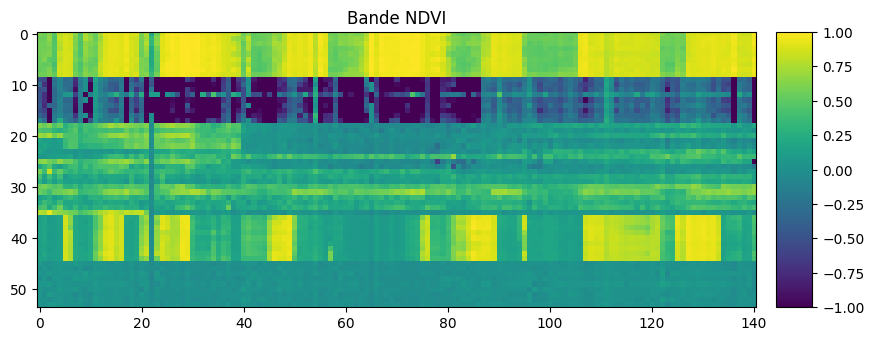

In [ ]:
matrice = np.delete(matrice_ndvi,22,1)
img = matrice
plt.figure(figsize=(10,10))
plt.title('Bande NDVI')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [ ]:
yhat = kmeans_dtw(matrice,6,15000)

,accuracy,f1_score
0,0.888889,0.883117


,calinski_harabasz_score
0,161.269421


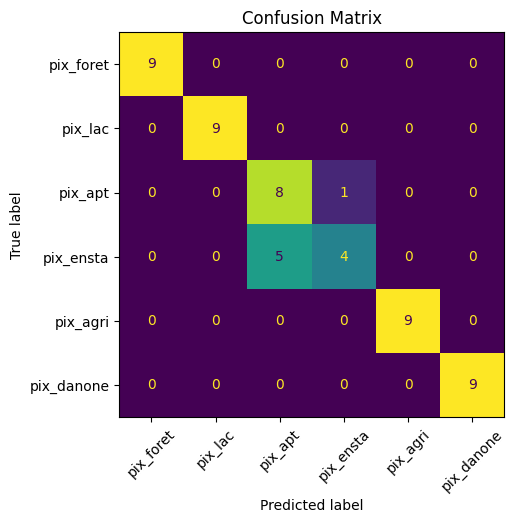

In [ ]:
eval_bandenri = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_bandenri.confusion_matrix()
display(eval_bandenri.metrics_classif())
display(eval_bandenri.metrics_clustering())